# **How are in-demand skills trending for Data Analysts?**

### **Methology**
- Aggregate skill counts monthly
- Re-analyze based on percentage of total jobs
- Plot the monthly skill demand

### **Original Exploration**
[11_Trending_Skills.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/11_Trending_Skills.ipynb)

### **Import Libraries and Data**

In [10]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### **Group the Skills by Month**

In [11]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries


df_AANZFTA = df[df['job_country'].isin(aanzfta_countries)]

In [12]:
## Skill count per month for data analysts
df_DA_AANZFTA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'].isin(aanzfta_countries))].copy()

df_DA_AANZFTA['job_posted_month_no'] = df_DA_AANZFTA['job_posted_date'].dt.month

# Explode job_skills column
df_DA_AANZFTA_explode = df_DA_AANZFTA.explode('job_skills')

### **Pivot in Prep for Plotting**

In [13]:
# Group by month and job_skills
df_DA_AANZFTA_pivot =df_DA_AANZFTA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_AANZFTA_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,visio,visual basic,vmware,vue,watson,windows,wire,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,1,7,1,0,1,0,0,0,0,...,2,6,0,0,0,9,0,16,1,0
2,3,0,9,2,0,0,2,0,0,0,...,0,1,0,0,0,2,0,13,2,2
3,2,0,4,0,1,0,0,0,0,0,...,1,0,0,0,0,2,0,17,1,0
4,0,0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,17,0,1
5,2,0,5,0,0,0,0,0,0,0,...,3,0,0,1,0,3,0,10,0,0
6,3,1,8,0,0,0,0,0,1,0,...,0,4,0,0,0,2,0,29,1,1
7,2,0,5,0,0,0,1,0,0,0,...,0,1,0,0,0,8,0,30,0,0
8,4,0,5,0,0,0,0,0,0,1,...,0,2,0,0,1,4,0,28,2,0
9,0,1,5,0,0,0,0,0,1,0,...,0,1,0,0,1,2,0,12,0,1


##### **Sort columns by count and change month numbers to names**

In [14]:
# sorts by count
df_DA_AANZFTA_pivot.loc['Total'] = df_DA_AANZFTA_pivot.sum()
df_DA_AANZFTA_pivot = df_DA_AANZFTA_pivot[df_DA_AANZFTA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_AANZFTA_pivot = df_DA_AANZFTA_pivot.drop('Total')

df_DA_AANZFTA_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,aws,azure,word,...,graphql,unity,trello,tidyverse,asana,theano,rust,datarobot,kotlin,tidyr
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,283,200,193,163,134,84,68,38,33,16,...,0,0,0,0,0,0,0,0,0,0
2,142,116,97,87,62,51,38,13,23,13,...,0,0,0,0,0,0,0,0,0,0
3,189,131,131,122,78,58,46,16,20,17,...,0,1,0,0,0,0,0,0,0,0
4,152,113,132,84,57,54,42,12,11,17,...,0,0,0,0,0,0,0,0,0,0
5,172,133,116,86,64,72,38,20,15,10,...,0,0,0,0,0,0,0,0,0,0
6,208,148,143,124,88,69,50,40,30,29,...,0,0,0,0,0,1,1,0,0,0
7,234,173,153,130,110,89,54,32,25,30,...,0,0,1,0,0,0,0,0,1,1
8,214,156,154,134,113,68,46,28,16,28,...,0,0,0,0,0,0,0,1,0,0
9,169,114,108,101,87,50,36,13,12,12,...,1,0,0,0,0,0,0,0,0,0


### **Plot the Monthly Skill Counts**

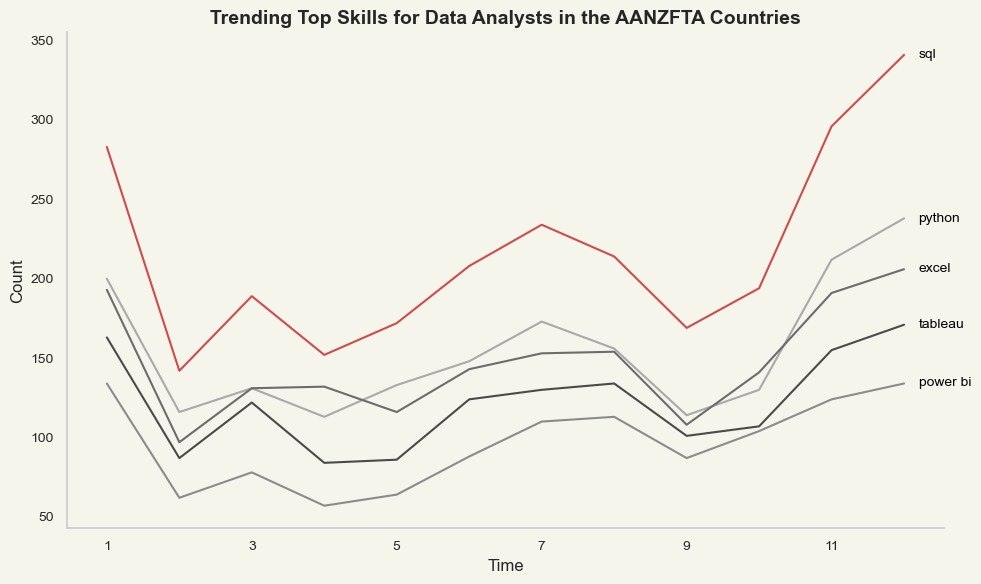

In [15]:
df_DA_AANZFTA_pivot.iloc[:, :5].plot(kind='line', figsize=(10, 6), ax=plt.gca())

for i in range(5):
    plt.text(11.2, df_DA_AANZFTA_pivot.iloc[-1, i], df_DA_AANZFTA_pivot.columns[i], color='black', fontsize=10, ha='left', va='center')


sns.set_theme(style='whitegrid')  
plt.gcf().set_facecolor('#F6F5EB') 
plt.rcParams['axes.facecolor'] = '#F6F5EB'  

plt.title('Trending Top Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Count', fontsize=12)

colors = ["#D14B4B", "#A9A9A9", "#6C6C6C", "#4A4A4A", "#8B8B8B"]
for i, line in enumerate(plt.gca().lines):
    line.set_color(colors[i]) 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.gca().grid(False)
plt.legend().set_visible(False)

plt.tight_layout()

plt.show()


### **Calculate Percentage of Total Jobs**

In [16]:
# Get monthly totals
DA_totals = df_DA_AANZFTA.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     520
2     276
3     324
4     292
5     302
6     354
7     404
8     396
9     309
10    405
11    584
12    604
dtype: int64

In [17]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_AANZFTA_percent = df_DA_AANZFTA_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_AANZFTA_percent = df_DA_AANZFTA_percent.reset_index()
df_DA_AANZFTA_percent['job_posted_month'] = df_DA_AANZFTA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_AANZFTA_percent = df_DA_AANZFTA_percent.set_index('job_posted_month')
df_DA_AANZFTA_percent = df_DA_AANZFTA_percent.drop(columns='job_posted_month_no')

df_DA_AANZFTA_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,aws,azure,word,...,graphql,unity,trello,tidyverse,asana,theano,rust,datarobot,kotlin,tidyr
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.423077,38.461538,37.115385,31.346154,25.769231,16.153846,13.076923,7.307692,6.346154,3.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.449275,42.028986,35.144928,31.521739,22.463768,18.478261,13.768116,4.710145,8.333333,4.710145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.333333,40.432099,40.432099,37.654321,24.074074,17.901235,14.197531,4.938272,6.172840,5.246914,...,0.000000,0.308642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,52.054795,38.698630,45.205479,28.767123,19.520548,18.493151,14.383562,4.109589,3.767123,5.821918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.953642,44.039735,38.410596,28.476821,21.192053,23.841060,12.582781,6.622517,4.966887,3.311258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,58.757062,41.807910,40.395480,35.028249,24.858757,19.491525,14.124294,11.299435,8.474576,8.192090,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.282486,0.282486,0.000000,0.000000,0.000000
Jul,57.920792,42.821782,37.871287,32.178218,27.227723,22.029703,13.366337,7.920792,6.188119,7.425743,...,0.000000,0.000000,0.247525,0.000000,0.000000,0.000000,0.000000,0.000000,0.247525,0.247525
Aug,54.040404,39.393939,38.888889,33.838384,28.535354,17.171717,11.616162,7.070707,4.040404,7.070707,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252525,0.000000,0.000000
Sep,54.692557,36.893204,34.951456,32.686084,28.155340,16.181230,11.650485,4.207120,3.883495,3.883495,...,0.323625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### **Plot Monthly Skill Demand**

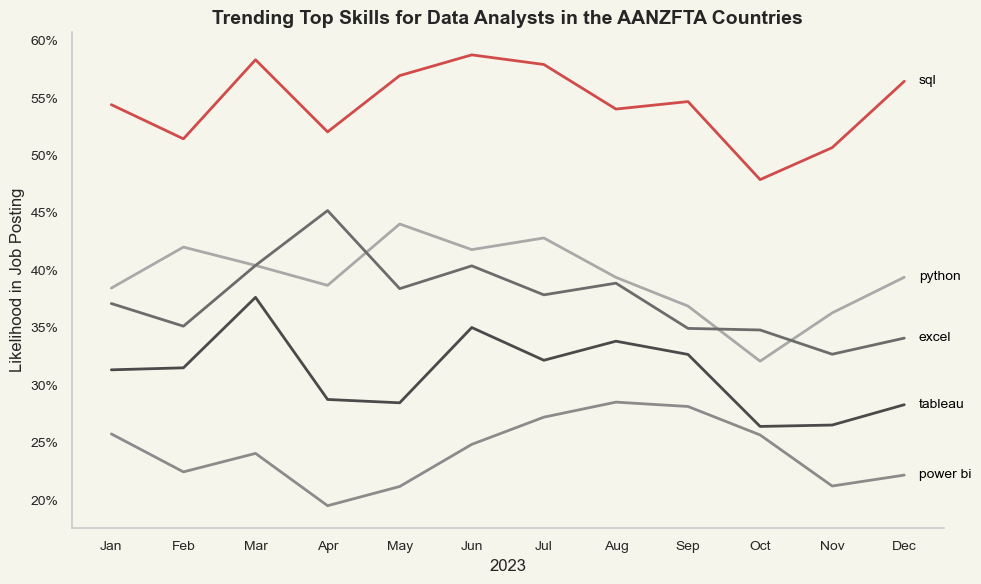

In [18]:
from matplotlib.ticker import PercentFormatter


df_plot = df_DA_AANZFTA_percent.iloc[:, :5]

colors = ["#D14B4B", "#A9A9A9", "#6C6C6C", "#4A4A4A", "#8B8B8B"]


sns.set_theme(style='whitegrid')  
plt.rcParams['axes.facecolor'] = '#F6F5EB'  

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#F6F5EB')  

sns.lineplot(data=df_plot, dashes=False, palette=colors, linewidth=2, ax=ax)

ax.set_title('Trending Top Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')
ax.set_xlabel('2023', fontsize=12)
ax.set_ylabel('Likelihood in Job Posting', fontsize=12)


ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

ax.legend().remove()


for i in range(5):
    ax.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black', fontsize=10, ha='left', va='center')


sns.despine()
ax.grid(False)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()
